In [ ]:
# 공용 소스코드 종합을 위한 개별 작성파일입니다.
# 해당파일에 공유할 코드를 작성해주시고, 수정시에는 꼭 해당양식을 맞춰서 해주세요.
# 작성코드에 세부적으로 주석을 달아주시면 감사드리겠습니다.
# 수정시에는 수정한 코드부분에 수정일시 및 수정내용을 작성해주세요.
# 공용 소스코드에 반영 후에는 반영완료로 제가 따로 수정해서 반영해드리겠습니다.
print('만나서 반갑습니다. 함께 힘을 모아 프로젝트 마무리까지 같이 잘해봅시다!') # 2021.09.29 16:35부 (수정) / 수정내용 : print문 추가

만나서 반갑습니다. 함께 힘을 모아 프로젝트 마무리까지 같이 잘해봅시다!


In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [180]:
df1 = pd.read_csv("/content/T20_2019_1백만.1.csv", encoding = "euc-kr")
df2 = pd.read_csv("/content/T20_2019_1백만.2.csv", encoding = "euc-kr")
df3 = pd.read_csv("/content/T20_2019_1백만.3.csv", encoding = "euc-kr")

In [181]:
df = pd.concat([df1,df2,df3])
df.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2019,1,104243474,2,12,46,20191104,3,5,M751,M750,1.0,1.0,0.25,19240.0,9600.0,9640.0,0.0,20201222.0
1,2019,1,107479370,2,12,46,20190806,3,1,E1164,N308,1.0,1.0,0.25,145680.0,72800.0,72880.0,0.0,20201222.0
2,2019,1,106881883,2,12,46,20190920,3,1,N308,E1164,1.0,1.0,0.25,13240.0,6600.0,6640.0,3.0,20201222.0
3,2019,1,109043837,2,12,46,20190807,2,1,E1164,N308,7.0,21.0,0.25,861590.0,205810.0,655780.0,0.0,20201222.0
4,2019,1,103174392,2,12,46,20190318,3,13,H6531,J303,1.0,1.0,0.15,48440.0,14500.0,33940.0,3.0,20201222.0


In [182]:
del df1, df2, df3

## df에 입원 여부 컬럼 추가 (입원 = 1 입원X = 0 로 바꾸기)

In [183]:
df['입원여부'] = df['서식코드'].apply(lambda x: 1 if x==2 else 0)
df.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,입원여부
0,2019,1,104243474,2,12,46,20191104,3,5,M751,M750,1.0,1.0,0.25,19240.0,9600.0,9640.0,0.0,20201222.0,0
1,2019,1,107479370,2,12,46,20190806,3,1,E1164,N308,1.0,1.0,0.25,145680.0,72800.0,72880.0,0.0,20201222.0,0
2,2019,1,106881883,2,12,46,20190920,3,1,N308,E1164,1.0,1.0,0.25,13240.0,6600.0,6640.0,3.0,20201222.0,0
3,2019,1,109043837,2,12,46,20190807,2,1,E1164,N308,7.0,21.0,0.25,861590.0,205810.0,655780.0,0.0,20201222.0,1
4,2019,1,103174392,2,12,46,20190318,3,13,H6531,J303,1.0,1.0,0.15,48440.0,14500.0,33940.0,3.0,20201222.0,0


## 0. 데이터 전처리
- 한 사람마다 입원 여부 판단

In [184]:
df['연령대'] = df['연령대코드'].apply(lambda x: ((x-1)//2)*10)
df.tail()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,입원여부,연령대
3333515,2019,953170,101326185,2,18,47,20190131,3,1,I109,E119,1.0,1.0,0.2,5670.0,2200.0,3470.0,10.0,20201222.0,0,80
3333516,2019,953170,103604914,2,18,47,20191205,3,1,K5909,G479,1.0,1.0,0.2,5670.0,2200.0,3470.0,28.0,20201222.0,0,80
3333517,2019,953170,111524289,2,18,47,20190513,3,1,I109,E119,1.0,1.0,0.2,5670.0,2200.0,3470.0,30.0,20201222.0,0,80
3333518,2019,953170,107705360,2,18,47,20190830,3,1,I109,E119,1.0,1.0,0.2,5670.0,2200.0,3470.0,30.0,20201222.0,0,80
3333519,2019,953170,104479910,2,18,47,20191101,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80


## 1. 입원비율

In [185]:
#### 1-1. 입원 비율 (모든 방문 횟수에 대해서)
df['입원여부'].mean()

0.021535396611855256

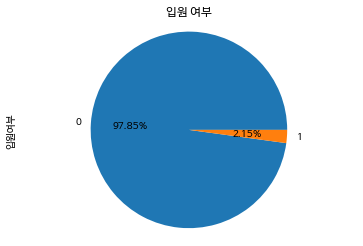

In [186]:
df_temp = df['입원여부'].value_counts()
df_temp.plot.pie(autopct='%.2f%%')
plt.title('입원 여부')
plt.axis('equal')
plt.show()

## 2. 연령별 입원 비율


In [204]:
df_0 = df.groupby(['연령대']).count()
df_0

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,입원여부
연령대,,,,,,,,,,,,,,,,,,,,
0,1250267,1250267,1250267,1250267,1250267,1250267,1250267,1250267,1250267,1250267,1250267,1250267,1250267,1250267,1250267,1250267,1250267,1250266,1250266,1250267
10,533905,533905,533905,533905,533905,533905,533905,533905,533905,533905,533905,533905,533905,533905,533905,533905,533905,533905,533905,533905
20,618006,618006,618006,618006,618006,618006,618006,618006,618006,618006,618006,618006,618006,618006,618006,618006,618006,618006,618006,618006
30,869540,869540,869540,869540,869540,869540,869540,869540,869540,869540,869540,869540,869540,869540,869540,869540,869540,869540,869540,869540
40,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035,1124035
50,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478,1595478
60,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492,1779492
70,1484085,1484085,1484085,1484085,1484085,1484085,1484085,1484085,1484085,1484085,1484084,1484084,1484084,1484084,1484084,1484084,1484084,1484084,1484084,1484085
80,739157,739157,739157,739157,739157,739157,739157,739157,739157,739156,739156,739156,739156,739156,739156,739156,739156,739156,739156,739157


In [197]:
df_1 = df.groupby(['연령대', '입원여부']).count()
df_1

기준년도  가입자 일련번호  진료내역일련번호  ...  심결보험자부담금    총처방일수  데이터 기준일자
연령대 입원여부                               ...                             
0   0     1230624   1230624   1230624  ...   1230624  1230623   1230623
    1       19643     19643     19643  ...     19643    19643     19643
10  0      528143    528143    528143  ...    528143   528143    528143
    1        5762      5762      5762  ...      5762     5762      5762
20  0      608161    608161    608161  ...    608161   608161    608161
    1        9845      9845      9845  ...      9845     9845      9845
30  0      853802    853802    853802  ...    853802   853802    853802
    1       15738     15738     15738  ...     15738    15738     15738
40  0     1105645   1105645   1105645  ...   1105645  1105645   1105645
    1       18390     18390     18390  ...     18390    18390     18390
50  0     1564150   1564150   1564150  ...   1564150  1564150   1564150
    1       31328     31328     31328  ...     31328    31328     31328
60  0     1743195   1743195   1743195  ...   1743195  1743195   1743195
    1       36297     36297     36297  ...     36297    36297     36297
70  0     1449059   1449059   1449059  ...   1449058  1449058   1449058
    1       35026     35026     35026  ...     35026    35026     35026
80  0      695962    695962    695962  ...    695961   695961    695961
    1       43195     43195     43195  ...     43195    43195     43195

[18 rows x 19 columns]

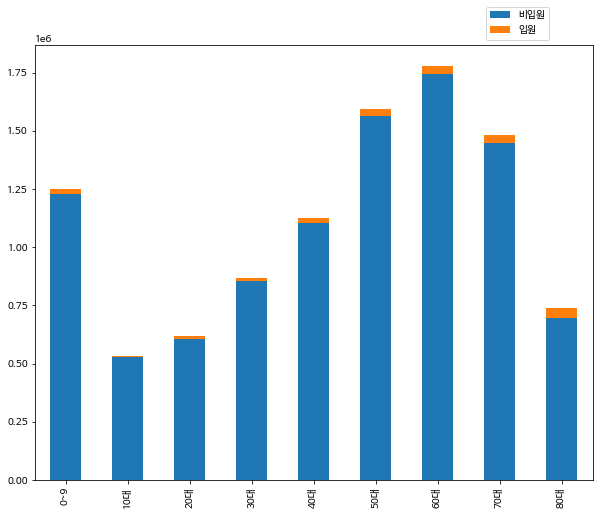

In [210]:
age = ['0~9','10대','20대','30대','40대','50대','60대','70대','80대']
data={
    '비입원' : [1230624, 528143, 608161, 853802, 1105645, 1564150, 1743195, 1449059, 695962],
    '입원' : [19643, 5762, 9845, 15738, 18390, 31328, 36297, 35026, 43195]
}
df=pd.DataFrame(data,index=age)

df.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

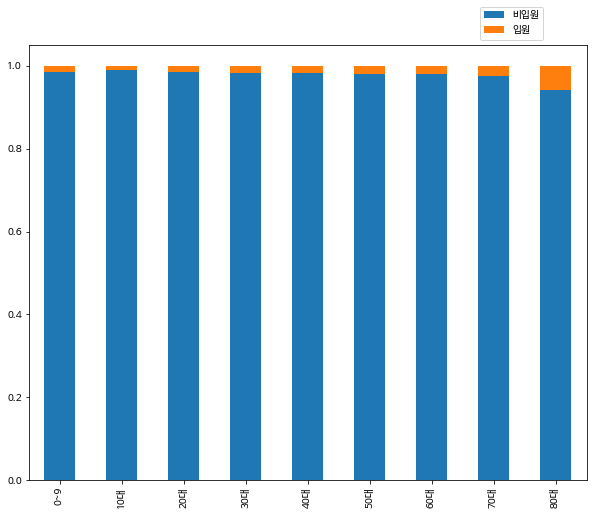

In [209]:
age = ['0~9','10대','20대','30대','40대','50대','60대','70대','80대']
data={
    '비입원' : [1230624/1250267, 528143/533905, 608161/618006, 853802/869540,\
             1105645/1124035, 1564150/1595478, 1743195/1779492, 1449059/1484085, 695962/739157],
    '입원' : [19643/1250267, 5762/533905, 9845/618006, 15738/869540,\
            18390/1124035, 31328/1595478, 36297/1779492, 35026/1484085, 43195/739157]
}
df=pd.DataFrame(data,index=age)

df.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

In [ ]:
## 진료 횟수별로
df_age1 = df['연령대'].value_counts().sort_index()
df_age1

0.0     21400
10.0     9084
20.0    10957
30.0    14791
40.0    18940
50.0    27019
60.0    31177
70.0    25194
80.0    13488
Name: 연령대, dtype: int64

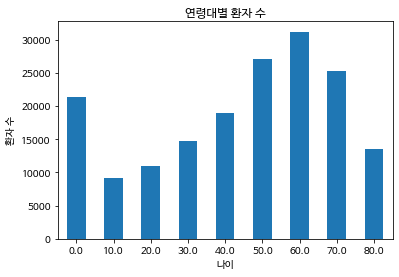

In [ ]:
df_age1.plot(kind='bar', rot=0)
plt.title("연령대별 환자 수")
plt.xlabel("나이")
plt.ylabel("환자 수")
plt.show()

## 3. 시도별 환자 수

In [78]:
df_sido1 = df['시도코드'].value_counts()
df_sido1

41.0    40662
11.0    30010
26.0    12062
48.0    11401
28.0     9478
27.0     9144
47.0     8975
44.0     7991
45.0     7472
46.0     7013
43.0     5849
30.0     5307
42.0     4761
29.0     4498
31.0     3951
49.0     2630
36.0      846
Name: 시도코드, dtype: int64

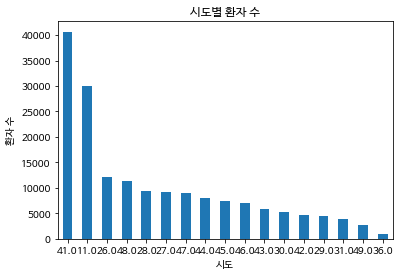

In [79]:
# 시도별 환자수 (중복 제거X)
df_sido1.plot(kind='bar', rot=0)
plt.title("시도별 환자 수")
plt.xlabel("시도")
plt.ylabel("환자 수")
plt.show()

In [80]:
df_sido = df_merge['시도코드'].value_counts()
df_sido

41.0    3416
11.0    2492
26.0     857
48.0     840
28.0     753
47.0     647
27.0     615
44.0     565
46.0     472
45.0     465
43.0     436
42.0     400
30.0     384
29.0     364
31.0     343
49.0     177
36.0      81
Name: 시도코드, dtype: int64

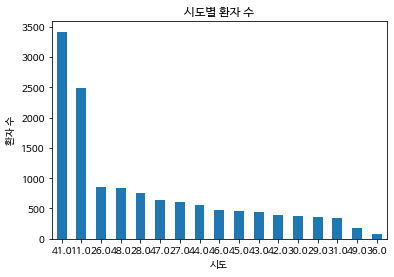

In [81]:
# 시도별 환자수 (중복 제거)
df_sido.plot(kind='bar', rot=0)
plt.title("시도별 환자 수")
plt.xlabel("시도")
plt.ylabel("환자 수")
plt.show()

## 4. 진료과목별 입원 비율

In [84]:
df_subject = df[['진료과목코드']].value_counts()
df_subject

진료과목코드
1.0       57092
5.0       28695
13.0      18582
12.0      11325
11.0       9870
14.0       8031
10.0       5099
4.0        5070
23.0       4677
6.0        4220
3.0        4085
15.0       3797
2.0        3181
9.0        2835
21.0       1853
24.0       1624
0.0         938
7.0         377
16.0        290
8.0         188
17.0        122
22.0         35
20.0         34
25.0         24
19.0          6
dtype: int64

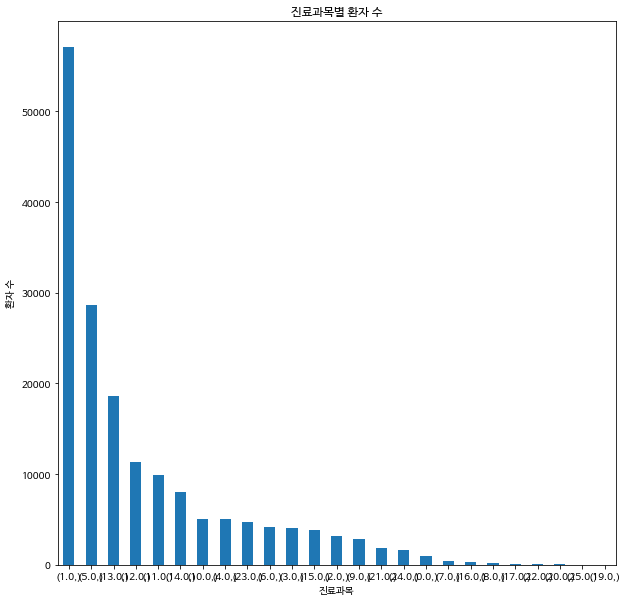

In [87]:
# 시도별 환자수 (중복 제거X)
df_subject.plot(kind='bar', rot=0, figsize=(10,10))
plt.title("진료과목별 환자 수")
plt.xlabel("진료과목")
plt.ylabel("환자 수")
plt.show()

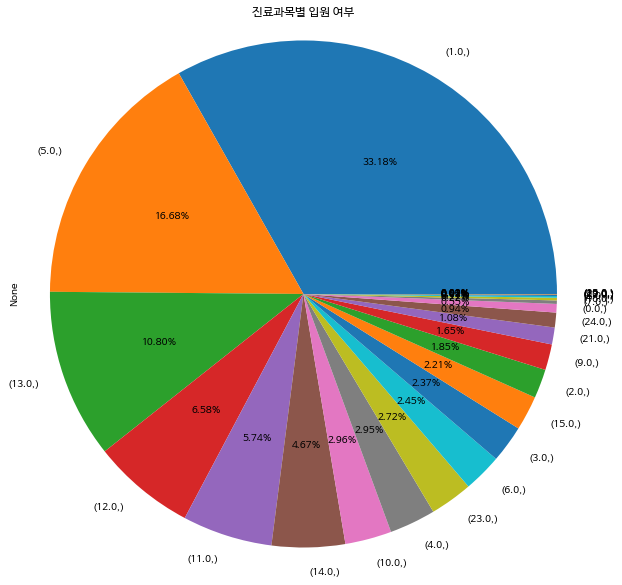

In [89]:
df_subject.plot.pie(autopct='%.2f%%', figsize=(10,10))
plt.title('진료과목별 입원 여부')
plt.axis('equal')
plt.show()